### Límites de k-means
Este método tiene algunas limitaciones, por ejemplo observe en seguida:

![](https://qph.fs.quoracdn.net/main-qimg-8179f95f9d2927d03bbbdeec584e4c1f)

<center>

# **DBSCAN**

</center>

Este algoritmo define los clústeres como regiones continuas de alta densidad. Así es como funciona:

1. Para cada instancia, el algoritmo cuenta cuántas instancias son
ubicado a una pequeña distancia $\epsilon$ (épsilon) de él. Esta región es
llamado vecindario $\epsilon$ de la instancia.

2. Si una instancia tiene al menos min_samples instancias en su vecindario ε (incluyéndose a sí misma), entonces se considera una instancia central. En otras palabras, las instancias centrales son aquellas que se ubican
en regiones densas.

3. Todas las instancias cercanas a una instancia principal pertenecen al mismo clúster. Este vecindario puede incluir otras instancias centrales; por lo tanto, una secuencia larga de instancias centrales vecinas forma un solo clúster.

4. Cualquier instancia que no sea una instancia central y no tenga una en su vecindario se considera una anomalía

![](https://miro.medium.com/proxy/1*tc8UF-h0nQqUfLC8-0uInQ.gif)

Note que algunos valores dan -1, estos son considerados anomalías para el modelo

## ALGORITMO DBSCAN:

- Basado en un conjunto de puntos (pensemos en un espacio bidimensional como se ejemplifica en la figura), DBSCAN agrupa puntos que están cerca entre sí en función de una medición de distancia (generalmente distancia euclidiana) y un número mínimo de puntos. También marca como valores atípicos los puntos que se encuentran en regiones de baja densidad.
- Representa la agrupación espacial basada en densidad de aplicaciones con ruido.
- Los clústeres son regiones densas en el espacio de datos, separadas por regiones de menor densidad de puntos. El algoritmo DBSCAN se basa en esta noción intuitiva de "clusters" y "ruido". La idea clave es que para cada punto de un grupo, la vecindad de un radio determinado debe contener al menos un número mínimo de puntos.

### Limitaciones de los métodos tradicionales:

Los métodos de partición (K-means, agrupación PAM) y la agrupación jerárquica funcionan para encontrar grupos de forma esférica o convexos. Es decir, sólo son adecuados para racimos compactos y bien separados. Además, también se ven gravemente afectados por la presencia de ruido y valores atípicos en los datos.

### K-medias Vs DBSCAN :

- La agrupación de K-Means puede agrupar observaciones poco relacionadas. Cada observación eventualmente se convierte en parte de algún grupo, incluso si las observaciones están dispersas muy lejos en el espacio vectorial. Dado que los conglomerados dependen del valor medio de los elementos del conglomerado, cada punto de datos desempeña un papel en la formación de los conglomerados. Un ligero cambio en los puntos de datos podría afectar el resultado de la agrupación. Este problema se reduce considerablemente en DBSCAN debido a la forma en que se forman los grupos. Por lo general, esto no es un gran problema a menos que nos encontremos con datos de formas extrañas.

- Otro desafío con k -means es que es necesario especificar el número de grupos (" k ") para poder usarlo. La mayor parte del tiempo, no sabremos cuál es un valor k razonable a priori .
- Lo bueno de DBSCAN es que no es necesario especificar la cantidad de clústeres para usarlo. Todo lo que necesita es una función para calcular la distancia entre valores y alguna orientación sobre qué cantidad de distancia se considera "cerca". DBSCAN también produce resultados más razonables que k -medias en una variedad de distribuciones diferentes


![](https://github.com/Wilsonsr/Metodos-Estadisticos/raw/main/BASES/dbscan_vs_kmeans.png)

Los datos de la vida real pueden contener irregularidades, como:

i) Los grupos pueden tener una forma arbitraria, como los que se muestran en la siguiente figura.

ii) Los datos pueden contener ruido.


La figura  muestra un conjunto de datos que contiene grupos no convexos y valores atípicos/ruidos. Dados estos datos, el algoritmo k-means tiene dificultades para identificar estos grupos con formas arbitrarias.

![](https://github.com/Wilsonsr/Metodos-Estadisticos/raw/main/BASES/dbscan_atipicos.png)



El algoritmo DBSCAN requiere dos parámetros:
- minPts: el número mínimo de puntos (un umbral) agrupados para que una región se considere densa.

- eps (ε): Una medida de distancia que se utilizará para ubicar los puntos en la vecindad de cualquier punto.




## Estimación de parámetros:

Toda tarea de minería de datos tiene el problema de los parámetros. Cada parámetro influye en el algoritmo de formas específicas. Para DBSCAN, se necesitan los parámetros ε y minPts.

- **minPts:** Como regla general, un mínimo de minPts se puede derivar del número de dimensiones D en el conjunto de datos, como minPts ≥ D + 1. El valor bajo minPts = 1 no tiene sentido, ya que entonces cada punto por sí solo ya será un grupo. Los minPts deben elegirse al menos 3. Sin embargo, los valores más grandes suelen ser mejores para conjuntos de datos con ruido y producirán grupos más significativos. Como regla general, se puede utilizar $minPts = 2· dim$ , pero puede ser necesario elegir valores mayores para datos muy grandes, para datos ruidosos o para datos que contienen muchos duplicados.


- ε: El valor de ε se puede elegir usando un gráfico de k-distancia , trazando la distancia al vecino más cercano $k = minPts -1$ ordenada del valor más grande al más pequeño. Buenos valores de $ε$ son aquellos en los que este gráfico muestra un “codo”: si ε se elige demasiado pequeño, una gran parte de los datos no se agruparán; mientras que para un valor demasiado alto de ε, los grupos se fusionarán y la mayoría de los objetos estarán en el mismo grupo. En general, son preferibles valores pequeños de ε y, como regla general, sólo una pequeña fracción de puntos debe estar dentro de esta distancia entre sí.

- Función de distancia: la elección de la función de distancia está estrechamente vinculada a la elección de $ε$ y tiene un impacto importante en los resultados. En general, será necesario identificar primero una medida razonable de similitud para el conjunto de datos, antes de poder elegir el parámetro $ε$. No existe una estimación para este parámetro, pero las funciones de distancia deben elegirse adecuadamente para el conjunto de datos.

 *Density-based Spatial Clustering of Applications with Noise* (DBSCAN). En esencia, podríamos pensar que DBSCAN es un algoritmo que divide el dataset en subgrupos, buscando regiones densas de puntos.

En DBSCAN, hay tres tipos de puntos:

- Puntos núcleo: puntos que tienen un mínimo número de puntos (MinPts) contenidos en una hiperesfera de radio epsilon.
- Puntos fronterizos: puntos que no son puntos núcleo, ya que no tienen suficientes puntos en su vecindario, pero si que pertenecen al vecindario de radio epsilon de algún punto núcleo.
- Puntos de ruido: todos los puntos que no pertenecen a ninguna de las categorías anteriores.


Una ventaja de DBSCAN es que no tenemos que especificar el número de clusters a priori. Sin embargo, requiere que establezcamos dos hiper-parámetros adicionales que son ``MinPts`` y el radio ``epsilon``.

In [1]:
import matplotlib.pyplot as plt


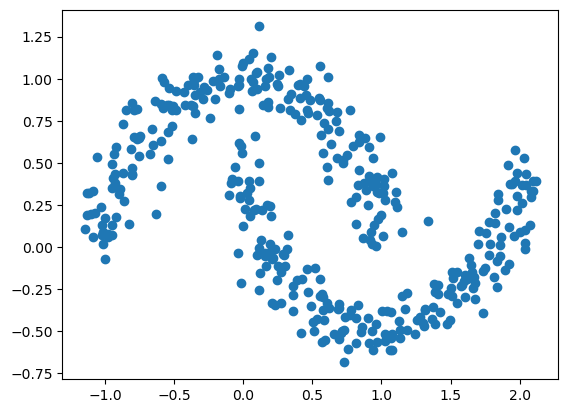

In [2]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=400,
                  noise=0.1,
                  random_state=1)
plt.scatter(X[:,0], X[:,1])
plt.show()

Etiquetas predichas:
 [ 0  1  0  0  1  0  1  0  1  0  1  0  1  0  0  2  0  1  1  2  1  0  0  2
  1  1  0  2  0  2  1  1  1  0  1  1  1  1  0  1  0  2  1  1  0  1  0  0
  0  0  1  2  0  1  0  0  0  1  0  0  1  1  0  0  0  0  1  0  0  0  2  1
  0  0  1  0  1  1  1  0  1  1  0 -1  1  1  0  2  0  1  1  0  0  0  1  0
  0  0  0  1  1  0  1  1  1  0  1  0  0  0  1  0  1  0  1  1  0  0  1  0
  1  1  0  2  0  1  1  1  0  0  0  0  0  0  0  0 -1  1  1  0  1  1  1  1
  1  1  1  1  1  1  0  1  1  1  2  0  1  1  1  2  1  0  0  1  0  1  1  0
  1  0  0  0  0  0  1  1  0  1  1  1  1  0  1  0  1  1  1  1  0  1  0  0
  0  1  0  1  1  0  1  1  0  1  0  0  0  1  1  1  2  1  0  1  0  0  0  1
  0  1  0  1  1  1  1  0  1  0  0  0  0  0  0  1  2  1  0  1  1 -1  2  0
  1  1  1  1  1  1  1  0  1  1  0  1  1  2  1  0  1  2  0  0  0  0  2  1
  0  0  0  1  1  1  1  0 -1  0  1  1  1  1  1  0  1  0  1  0  1  1  1  1
  1  2  1  0  1  0  1  2  0  1  0  1  0  1  0  1  2  1  0  0  1  0  1  1
  0  0  0  1  1  0  0  1  1  

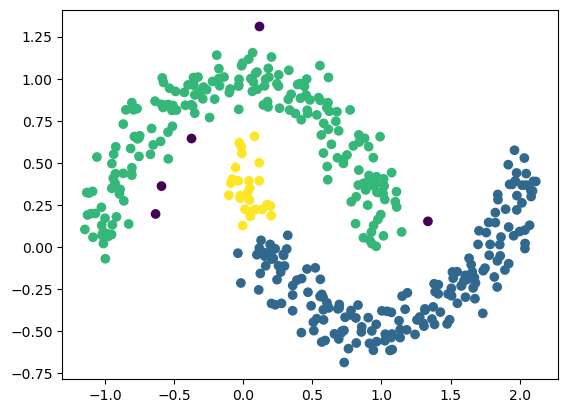

In [22]:
from sklearn.cluster import DBSCAN
## CREAR EL ALGORITMO
db = DBSCAN(eps=0.15,
            min_samples=5,
            metric='euclidean')

#### eNTRENARLO
prediction = db.fit_predict(X)

print("Etiquetas predichas:\n", prediction)

plt.scatter(X[:, 0], X[:, 1], c=prediction);

In [27]:
prediction[prediction==-1]

array([-1, -1, -1, -1, -1], dtype=int64)

<div class="alert alert-success">
    <b>EJERCICIO</b>:
     <ul>
      <li>
      Usando el siguiente conjunto sintético, dos círculos concéntricos, experimenta los resultados obtenidos con los algoritmos de clustering que hemos considerado hasta el momento: `KMeans`, `AgglomerativeClustering` y `DBSCAN`.

¿Qué algoritmo reproduce o descubre mejor la estructura oculta (suponiendo que no conocemos `y`)?

¿Puedes razonar por qué este algoritmo funciona mientras que los otros dos fallan?
      </li>
    </ul>
</div>

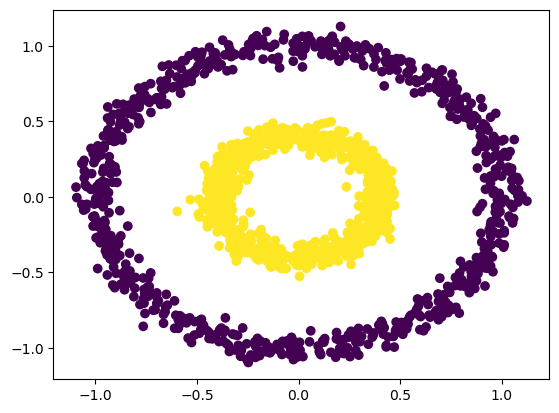

In [31]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1500,
                    factor=.4,
                    noise=.05)

plt.scatter(X[:, 0], X[:, 1], c=y);

In [30]:
X

array([[-0.94237438, -0.29395452],
       [-0.88866707,  0.49325702],
       [-0.29605634,  0.21989525],
       ...,
       [-0.39672068, -0.08837908],
       [-0.25743649, -0.22381725],
       [ 1.02939634, -0.09524232]])

## K-Means

In [36]:
from sklearn.cluster import KMeans

#construir el modelo kmeans
modelo_km=KMeans(n_clusters=2, random_state=123)

##  Ajustar el modelo o entrenar

modelo_km.fit(X)

#### Etiquetas de los cluster

etiquetas_km =modelo_km.labels_
etiquetas_km



array([1, 1, 0, ..., 0, 1, 0])

In [39]:
import plotly.express as px

Text(0.5, 1.0, 'Algoritmo Kmeans')

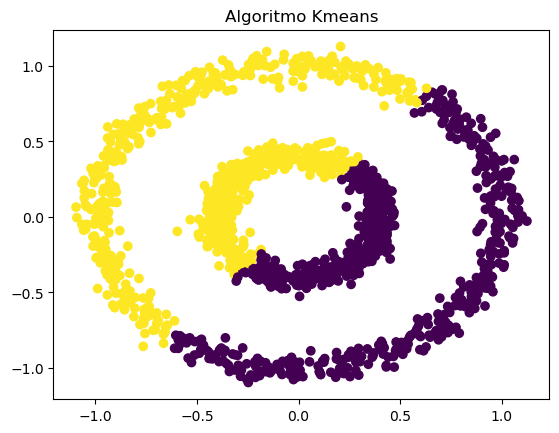

In [42]:
plt.scatter(X[:,0], X[:,1], c=etiquetas_km)
plt.title("Algoritmo Kmeans")

### Aglomerativo

In [44]:
from scipy.cluster.hierarchy import dendrogram, linkage

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [12.5, 12.5, 42.5, 42.5],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [105.0, 105.0, 115.0, 115.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [110.0, 110.0, 132.5, 132.5],
  [82.5, 82.5, 121.25, 121.25],
  [65.0, 65.0, 101.875, 101.875],
  [155.0, 155.0, 165.0, 165.0],
  [175.0, 175.0, 185.0, 185.0],
  [160.0, 160.0, 180.0, 180.0],
  [83.4375, 83.4375, 170.0, 170.0],
  [27.5, 27.5, 126.71875, 126.71875],
  [195.0, 195.0, 205.0, 205.0],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [200.0, 200.0, 222.5, 222.5],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [255.0, 255.0, 272.5, 272.5],
  [245.0, 245.0, 263.75, 263.75],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [302.5, 302.5, 332.5, 332.5],
  [254.375, 25

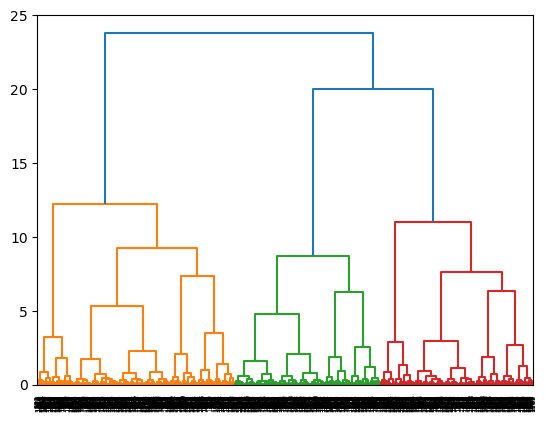

In [46]:
clusters= linkage(X,
                  method="ward",
                  metric="euclidean")

dendrogram(clusters)

In [53]:
from sklearn.cluster import AgglomerativeClustering

### crear modelo

modelo_aglomer=AgglomerativeClustering(n_clusters=2, metric="euclidean",
                                       linkage="ward")


### ajustar modelo - Entrenar
modelo_aglomer.fit(X)


#####
etiquetas_aglomer= modelo_aglomer.labels_



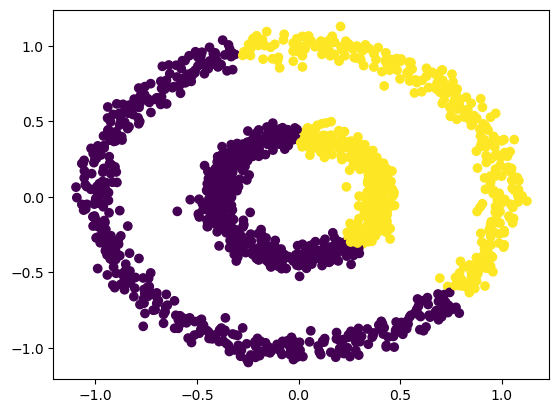

In [54]:
plt.scatter(X[:,0], X[:,1], c=etiquetas_aglomer)

## DBSCAN

In [83]:
from sklearn.cluster import DBSCAN

### MODELO
modelo_DB=DBSCAN(eps=0.08, min_samples=5)
####

modelo_DB.fit(X)

####

etiquetas_db=modelo_DB.labels_



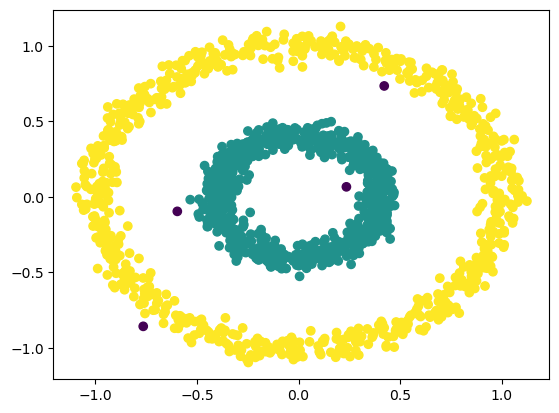

In [84]:
plt.scatter(X[:,0], X[:,1], c=etiquetas_db)

In [61]:
X.shape

(1500, 2)

Ayuda determinar $\epsilon$

In [73]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
### calcular la distancia al k-esimo vecito más cercano
k=5

nn=NearestNeighbors(n_neighbors=k)
nn.fit(X)

distancias, _=nn.kneighbors(X)
distancias=np.sort(distancias[:,-1])



In [74]:
distancias

array([0.01007154, 0.0117733 , 0.01202054, ..., 0.12234   , 0.12420866,
       0.12754874])

Text(0, 0.5, 'Distancia al k-esimo vecino más cercano')

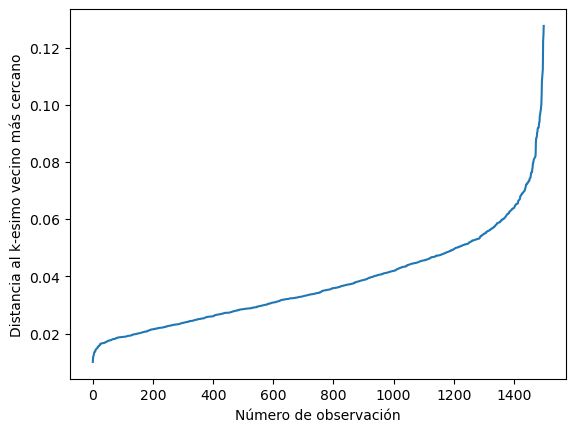

In [78]:
### graficar codo
plt.plot(distancias)
plt.xlabel("Número de observación")
plt.ylabel("Distancia al k-esimo vecino más cercano")




## Notas importantes

1. Antes de hacer un modelo no supervisado es importante reducir la dimensionalidad. Por ejemplo usando reducción por componentes principales (PCA) (asociación lineal), [t-distributed Stochastic Neighbor Embedding (t-SNE)](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html), Autoencoders

2. Considere usar k-means en primera medida e intente mejorar los resultados con mezclas gaussianas utilizando las métricas de evaluación (silueta, inercia).

3. Si su interés es encontrar datos atípicos o anómalos, considere utilizar DBScan, dado que este método se especializa en encontrar puntos que están por fuera de la masa de puntos. También es muy útil en geométricas complejas (como las lunas), pero en la práctica no es habitual.


## Lecturas adicionales

* [Mini curso aprendizaje no supervisado Google](https://developers.google.com/machine-learning/clustering)
* [Interpretando clusters](https://towardsdatascience.com/interpreting-clusters-29975099eea1)
* [Cuando deberíamos usar aprendizaje no supervisado](https://www.explorium.ai/blog/clustering-when-you-should-use-it-and-avoid-it/)